In [1]:
# Importing the Libarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\yasha\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Importing the dataset from local drive

df = pd.read_csv(r"C:\Users\yasha\Desktop\Ineuron.ai\datasets fsds\Algerian_forest_fires_dataset_UPDATE.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# As in our dataset in the middle we are having another dataset combined named siddi-bel's ames dataset and then again names of the columns, we will just remove those rows, and clean that part.

In [5]:
df = df.drop(labels=122, axis=0)
df = df.drop(labels=123, axis=0)

In [6]:
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [7]:
df['day']         = df['day'].astype('int')
df['month']       = df['month'].astype('int')
df['year']        = df['year'].astype('int')
df['Temperature'] = df['Temperature'].astype('int')
df['RH']          = df['RH'].astype('int')
df['Ws']          = df['Ws'].astype('int')
df['Rain']        = df['Rain'].astype('float')
df['FFMC']        = df['FFMC'].astype('float')
df['DMC']         = df['DMC'].astype('float')
#df['DC']          = df['DC'].astype('float')
df['ISI']         = df['ISI'].astype('float')
df['BUI']         = df['BUI'].astype('float')
df['FWI']         = df['FWI'].astype('float')

### As per observation we can see DC as Object datatype
 

In [8]:
df["DC"].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [9]:
df['DC'].str.isnumeric().sum()

27

In [10]:
df['DC'].value_counts()

8        5
7.6      4
7.8      4
8.4      4
7.5      4
        ..
90.4     1
100.7    1
110.9    1
120.9    1
16.5     1
Name: DC, Length: 198, dtype: int64

In [11]:
df['DC'].str.isalpha().sum()

0

In [12]:
# In one varibale there is space between numbers so we'll replace that.

df['DC'] = df['DC'].str.replace(' ','')

In [13]:
df['DC'] = df["DC"].astype("float64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 22.9+ KB


In [15]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.015574,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.431692,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,NaN


In [16]:
df.shape

(244, 14)

In [17]:
# Checking for missing values

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [18]:
# checking for duplicate values

df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


# EDA

In [19]:
#checking for correlation of dataset

df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350980
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083736
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.560552
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.572590
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029909
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323337
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.687633
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875451
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740018


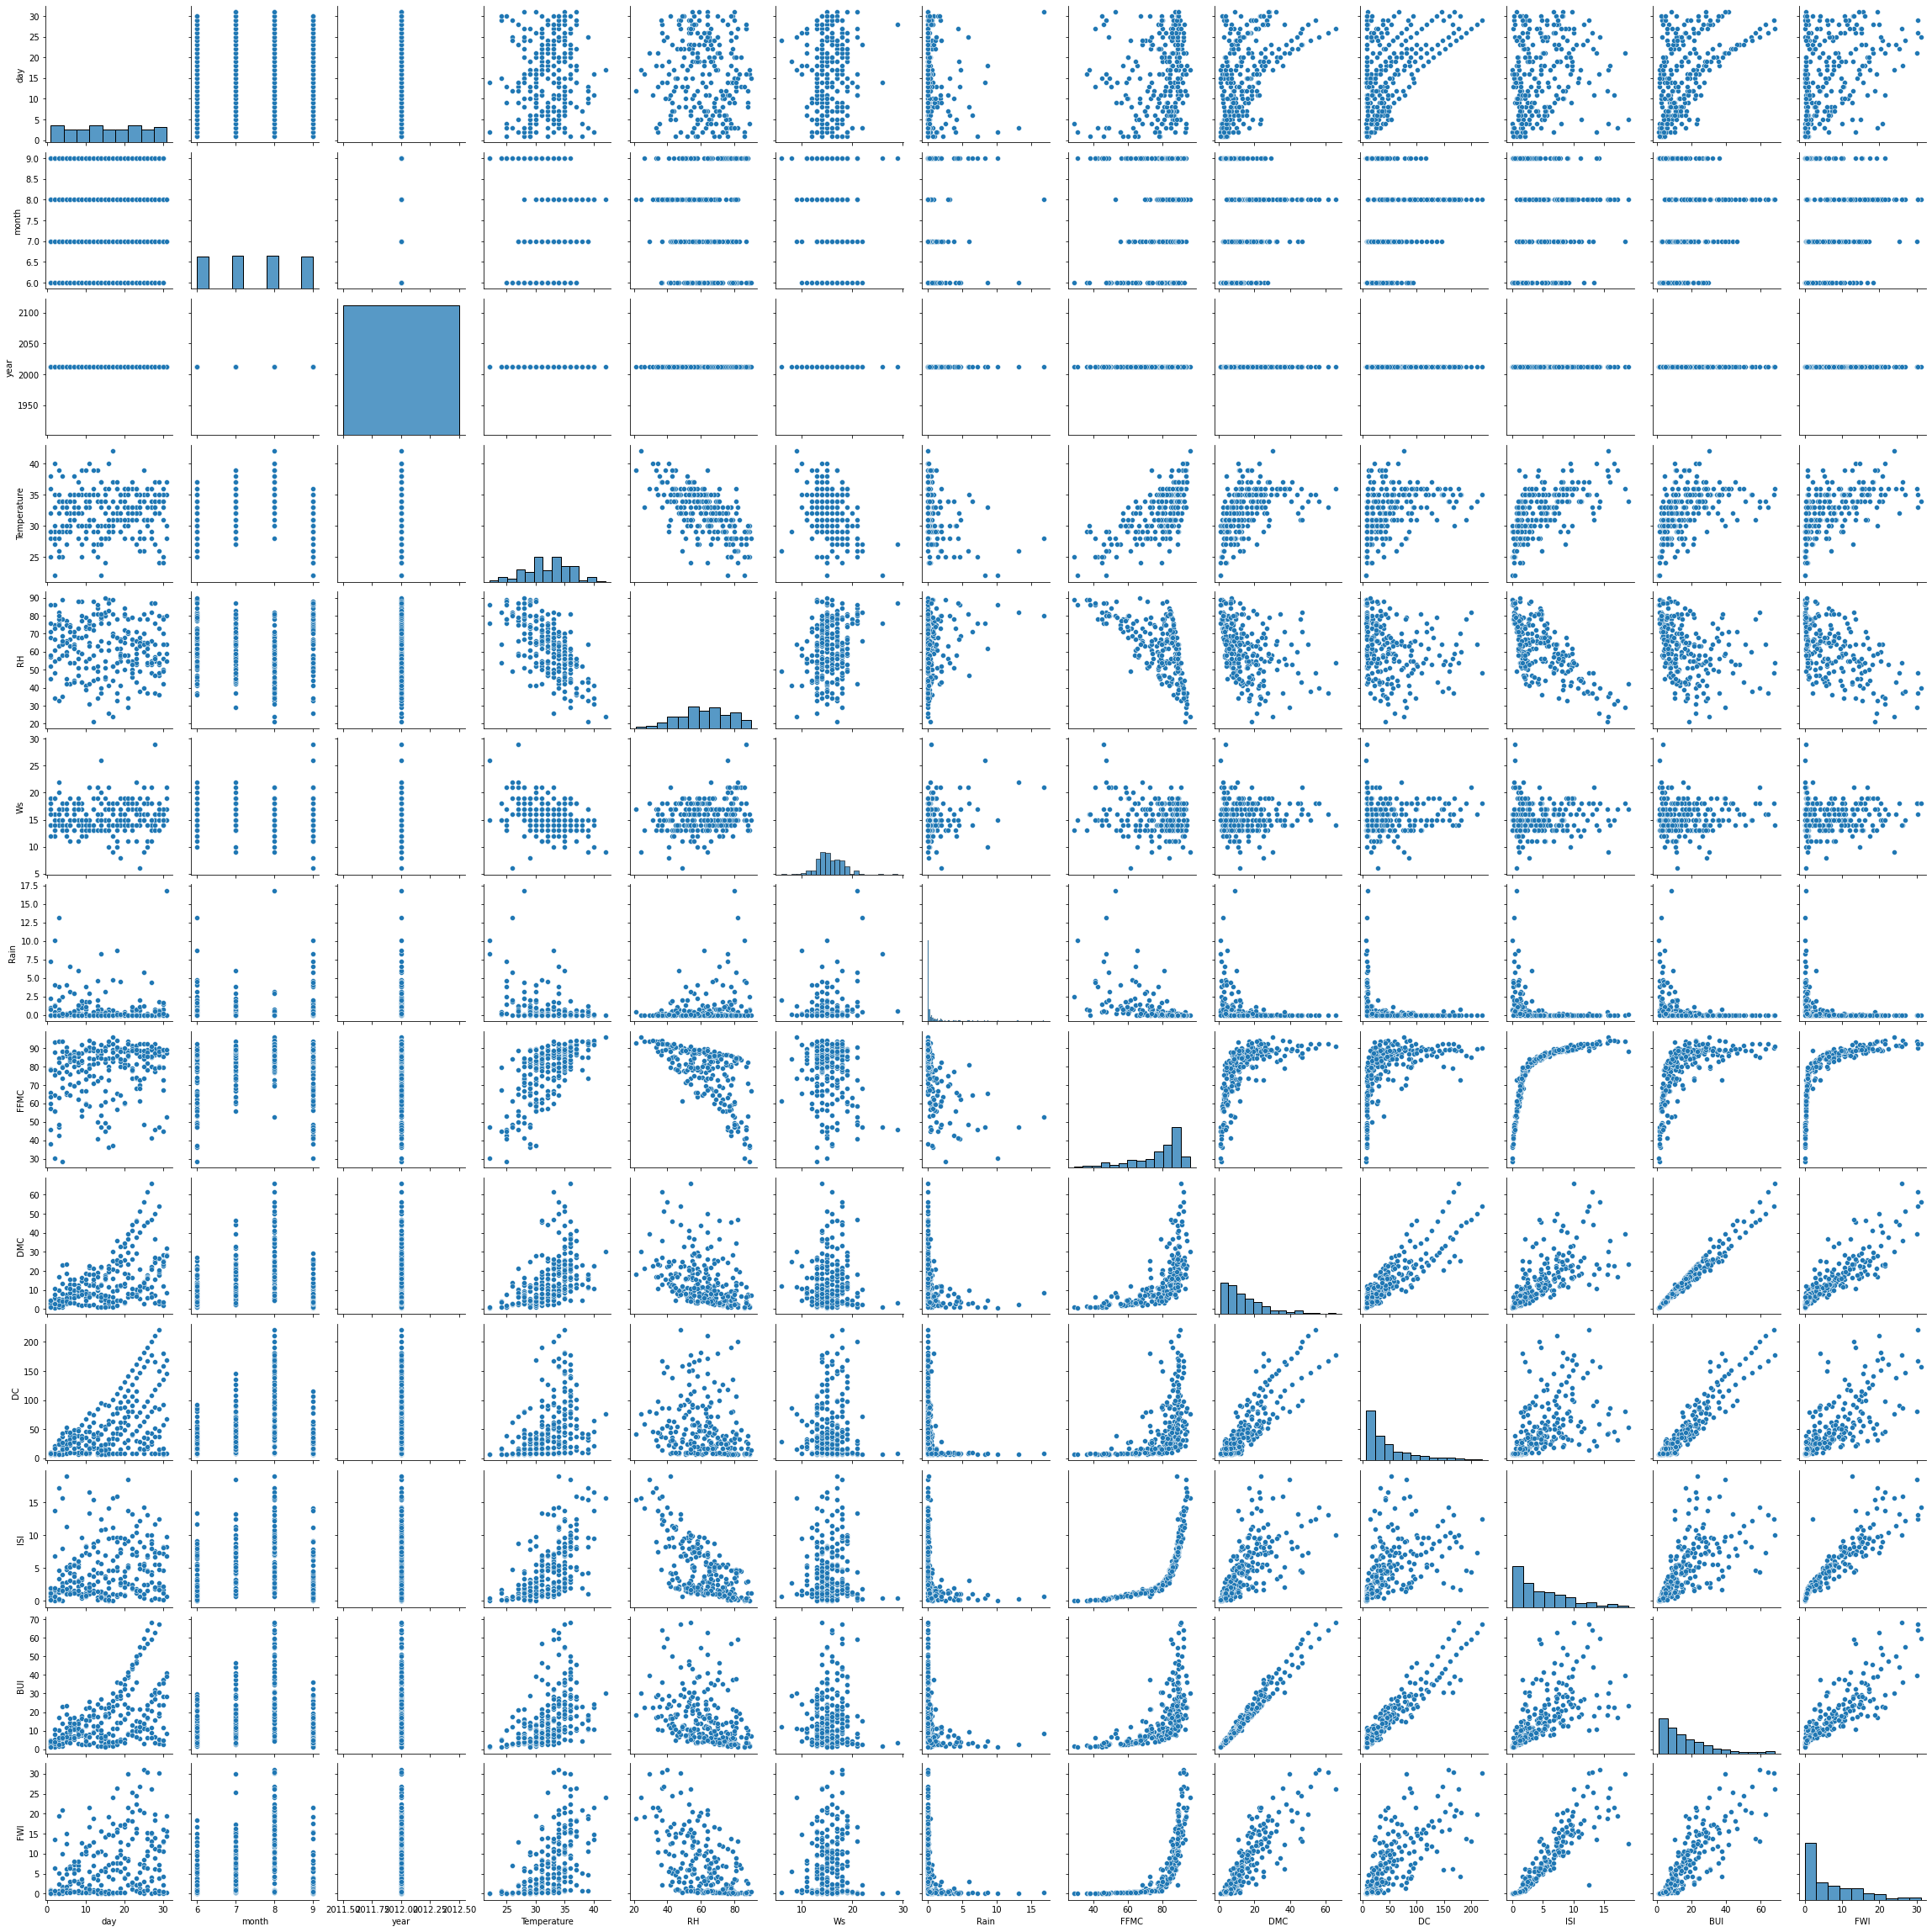

In [20]:
# ploting a graph

sns.pairplot(df)

<AxesSubplot:>

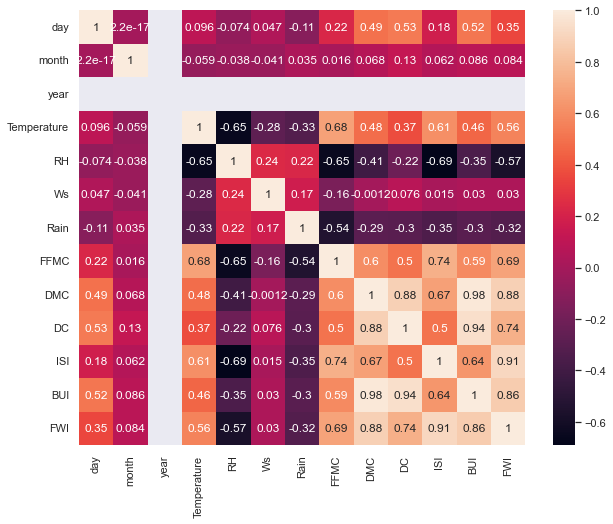

In [21]:
sns.set(rc ={'figure.figsize':(10,8)})
sns.heatmap(df.corr(),annot=True)

we can see for 
1. DMC and BUI 
2. FWI and ISI are highly correleated to each other

In [22]:
# now the Temperature is target varibale we'll check the correlation with Highly correlated coloumns
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

Text(0, 0.5, 'DMC')

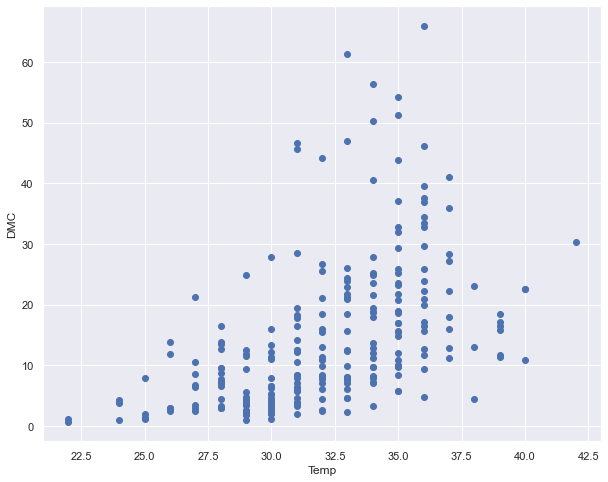

In [23]:
plt.scatter(df['Temperature'],df['DMC'])
plt.xlabel("Temp")
plt.ylabel("DMC")

<AxesSubplot:xlabel='Temperature', ylabel='BUI'>

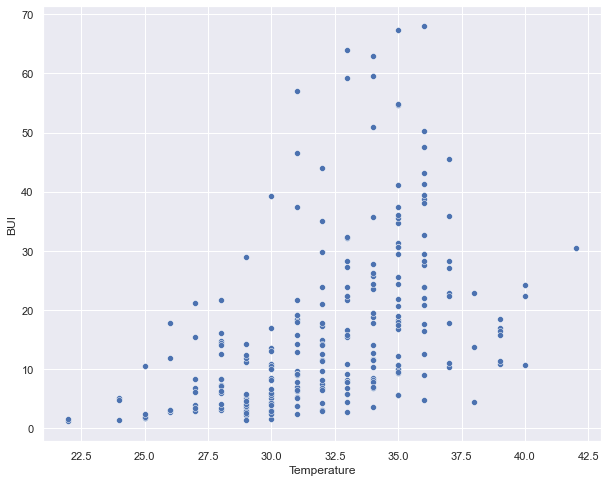

In [24]:
sns.scatterplot(x = "Temperature", y = 'BUI', data=df)

Text(0, 0.5, 'FWI')

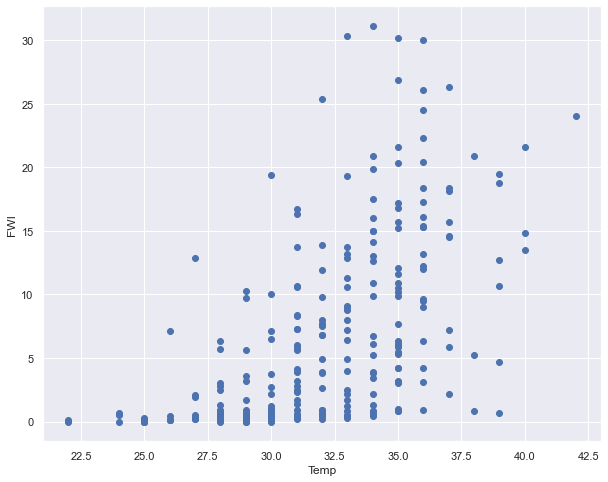

In [25]:
plt.scatter(df['Temperature'],df['FWI'])
plt.xlabel("Temp")
plt.ylabel("FWI")

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

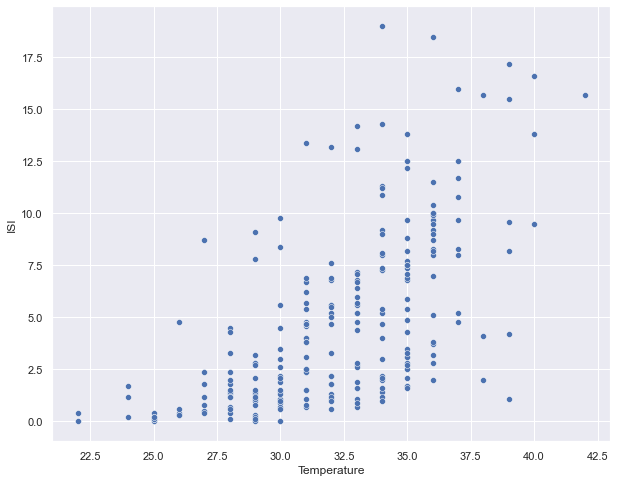

In [26]:
sns.scatterplot(x = "Temperature", y = 'ISI', data=df)

In [27]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

<AxesSubplot:xlabel='Temperature', ylabel='FWI'>

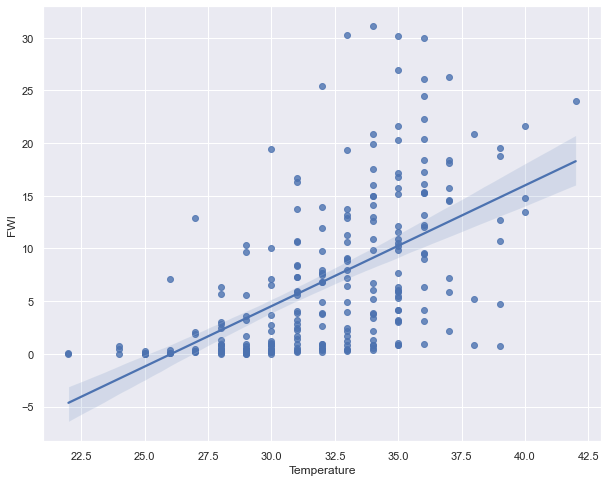

In [28]:
sns.regplot(x = "Temperature", y = 'FWI', data=df)

<AxesSubplot:xlabel='Temperature', ylabel='RH'>

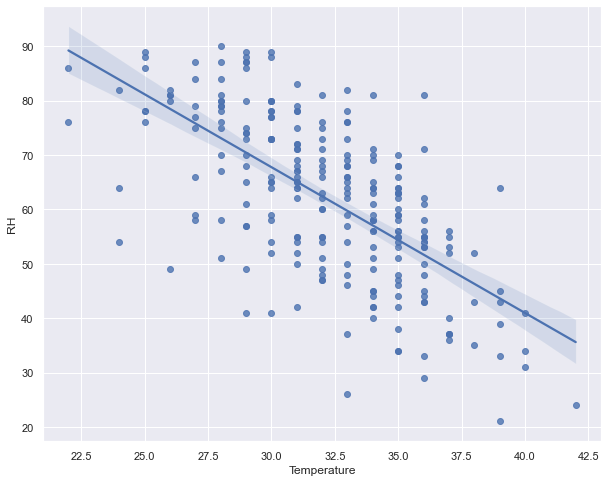

In [29]:
sns.regplot(x = "Temperature", y = 'RH', data=df)

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

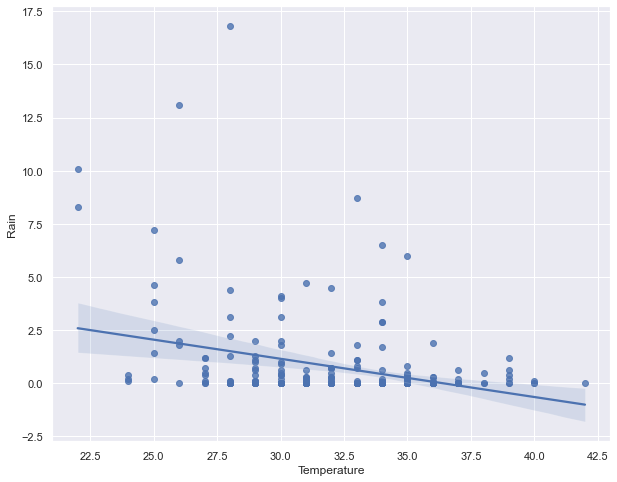

In [30]:
sns.regplot(x = "Temperature", y = 'Rain', data=df)

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

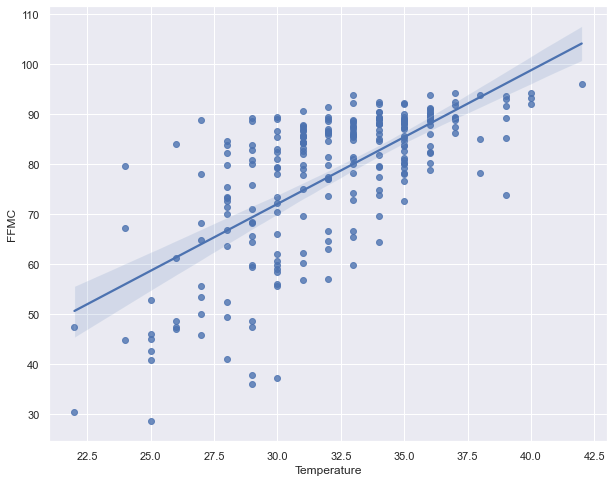

In [31]:
sns.regplot(x = "Temperature", y = 'FFMC', data=df)

# Checking for outliers

<AxesSubplot:>

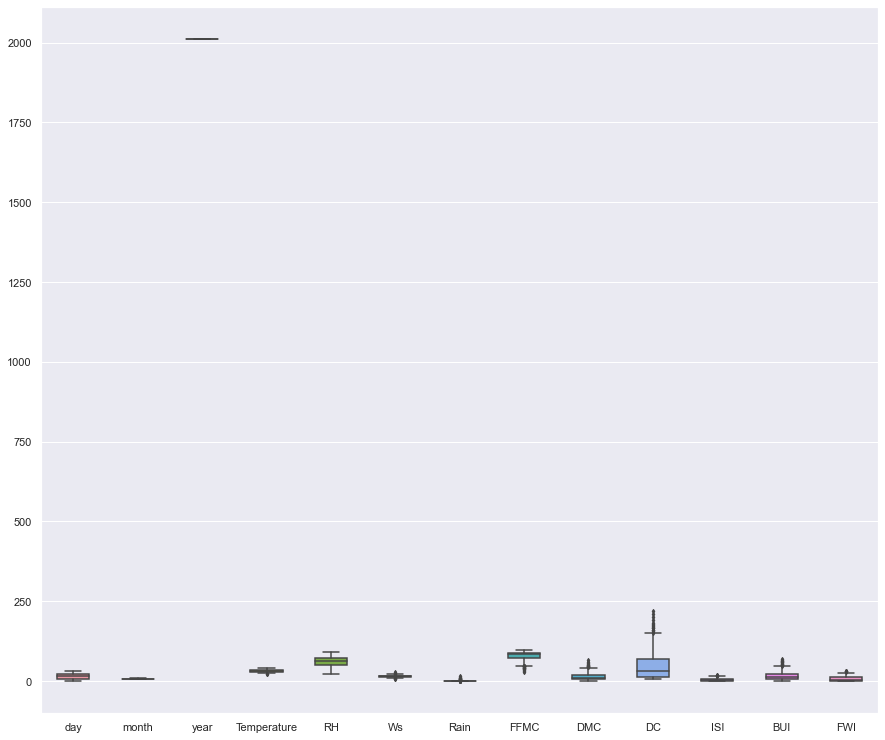

In [32]:
fig, ax = plt.subplots(figsize=(15,13))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

# so we can clearly see here in DC has high outliers

<AxesSubplot:xlabel='DC'>

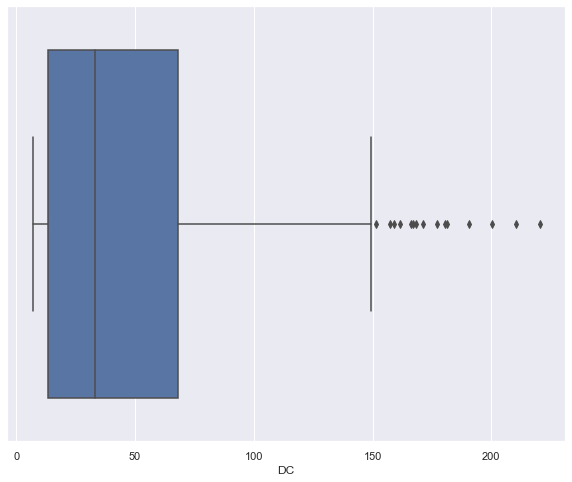

In [33]:
sns.boxplot(df['DC'])

In [34]:
df['Classes'] = df['Classes'].str.strip()

In [35]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [36]:
df['Classes'] = df['Classes'].replace(['not fire', 'fire'],[0,1])

# Dividing the dataset as independent and dependent features

In [37]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [38]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [39]:
x = df.drop(columns='Temperature')

In [40]:
x.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [41]:
y = df['Temperature']

In [42]:
y

0      29
1      29
2      26
3      25
4      27
       ..
241    30
242    28
243    27
244    24
245    24
Name: Temperature, Length: 244, dtype: int32

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10)

In [45]:
x_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,24,9,2012,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0
78,18,8,2012,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1
25,26,6,2012,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1
126,3,6,2012,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
178,25,7,2012,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,2012,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1
15,16,6,2012,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0
230,15,9,2012,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1
127,4,6,2012,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0


In [46]:
x_train.shape

(163, 13)

In [47]:
x_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
164,11,7,2012,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0
60,31,7,2012,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1
61,1,8,2012,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0
63,3,8,2012,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,0
69,9,8,2012,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,18,7,2012,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1
234,19,9,2012,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1
146,23,6,2012,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0
210,26,8,2012,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1


In [48]:
x_test.shape

(81, 13)

In [49]:
y_train

239    26
78     36
25     31
126    29
178    39
       ..
64     34
15     29
230    32
127    30
9      28
Name: Temperature, Length: 163, dtype: int32

In [50]:
y_train.shape

(163,)

In [51]:
y_test

164    34
60     35
61     36
63     35
69     35
       ..
171    33
234    29
146    33
210    33
105    22
Name: Temperature, Length: 81, dtype: int32

In [52]:
y_test.shape

(81,)

# Standardize or feature scaling the datasets

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
scaler

StandardScaler()

In [55]:
x_train = scaler.fit_transform(x_train)

In [56]:
x_test = scaler.transform(x_test)

In [57]:
x_train

array([[ 1.0627621 ,  1.33562856,  0.        , ..., -0.32535487,
        -0.85885036, -1.06992376],
       [ 0.34495731,  0.44338489,  0.        , ...,  0.76565444,
         1.21972346,  0.93464604],
       [ 1.30203036, -1.34110244,  0.        , ...,  0.35302912,
         0.49156066,  0.93464604],
       ...,
       [-0.01394508,  1.33562856,  0.        , ...,  0.08727045,
         0.38564607,  0.93464604],
       [-1.32992053, -1.34110244,  0.        , ..., -0.76595478,
        -0.77941442, -1.06992376],
       [-0.61211574, -1.34110244,  0.        , ..., -0.27639932,
        -0.79265374, -1.06992376]])

In [58]:
x_test

array([[-0.49248161, -0.44885878,  0.        , ..., -0.68203099,
        -0.80589307, -1.06992376],
       [ 1.90020102, -0.44885878,  0.        , ...,  1.72378441,
         1.16676617,  0.93464604],
       [-1.68882292,  0.44338489,  0.        , ..., -0.82889763,
        -0.79265374, -1.06992376],
       ...,
       [ 0.94312797, -1.34110244,  0.        , ..., -0.68902464,
        -0.80589307, -1.06992376],
       [ 1.30203036,  0.44338489,  0.        , ...,  3.31833647,
         3.09970744,  0.93464604],
       [-0.13357921,  1.33562856,  0.        , ..., -1.04570076,
        -0.89856833, -1.06992376]])

# Model Training

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression = LinearRegression()

In [61]:
regression

LinearRegression()

In [62]:
regression.fit(x_train,y_train)

LinearRegression()

# print the coefficients and the intercept

In [63]:
print(regression.coef_)

[-1.45992154e-01 -3.04124463e-01  3.33066907e-16 -1.27839857e+00
 -5.95706963e-01 -1.88396844e-01  9.28215384e-01  5.67112550e-01
  9.75384284e-01  3.80805678e-01 -8.48393042e-01 -3.64926151e-01
  2.06204927e-01]


In [64]:
print(regression.intercept_)

32.17791411042945


# prediction for test data

In [65]:
reg_pred = regression.predict(x_test)

In [66]:
reg_pred

array([31.72312155, 33.4416333 , 33.45730872, 31.68803009, 33.07350841,
       34.81650899, 33.85364891, 33.92789341, 32.29390309, 33.45055543,
       33.56131143, 27.18864738, 35.27005157, 29.09073287, 32.29405248,
       32.12862906, 34.72392741, 27.39298385, 36.07487288, 34.39184837,
       33.45126649, 33.75884598, 33.9711344 , 33.04155557, 35.89644677,
       28.96807605, 32.53807896, 32.30794903, 26.93269919, 32.433641  ,
       25.42325916, 26.53813611, 34.72864228, 32.00504885, 33.35485664,
       30.09164329, 29.19970486, 32.27205452, 27.23327748, 35.61948405,
       32.5917643 , 33.96021105, 34.21968433, 31.03868633, 36.41356542,
       34.24198475, 24.51640099, 35.19270586, 34.00341299, 29.11219399,
       31.68600536, 32.74307639, 35.50230163, 32.87966608, 29.90245828,
       29.8886918 , 32.79232834, 36.28049138, 31.19115011, 33.09470061,
       32.67531167, 32.93504596, 31.66513109, 25.28448474, 31.47810092,
       36.3073049 , 29.15423121, 29.90769762, 34.83648427, 33.88

# assumption for linear Regression

Text(0, 0.5, 'test predicted data')

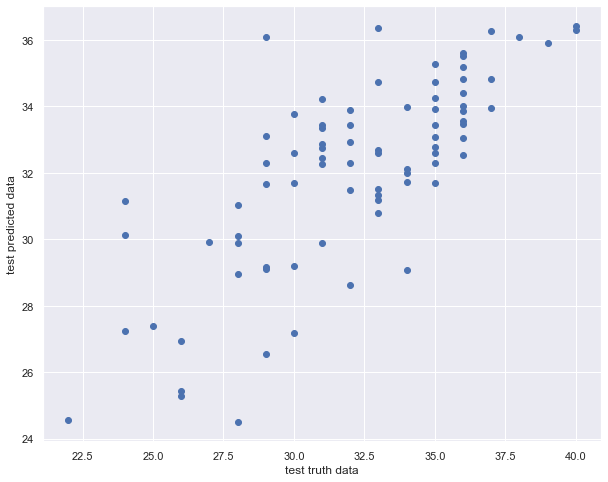

In [67]:
plt.scatter(y_test,reg_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

# residuals or error

In [68]:
residuals = y_test - reg_pred

In [69]:
residuals

164    2.276878
60     1.558367
61     2.542691
63     3.311970
69     1.926492
         ...   
171    0.391783
234   -7.095279
146    1.483887
210   -3.358530
105   -2.549056
Name: Temperature, Length: 81, dtype: float64

<AxesSubplot:ylabel='Temperature'>

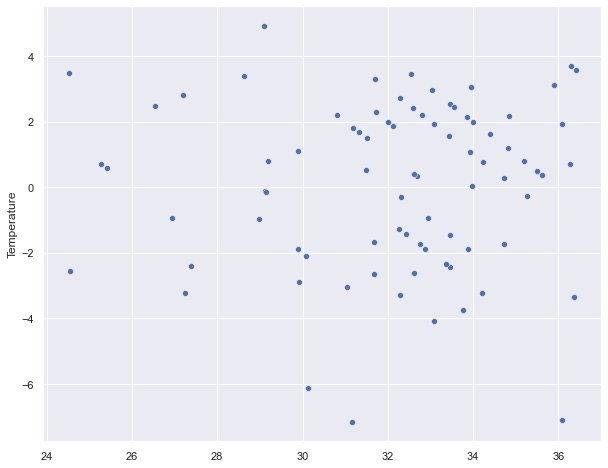

In [70]:
sns.scatterplot(reg_pred,residuals)

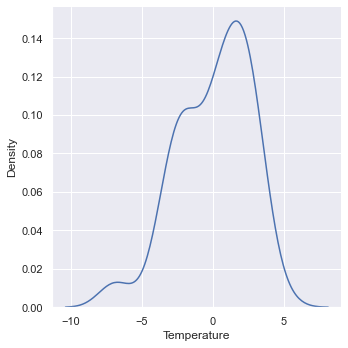

In [71]:
sns.displot(residuals,kind='kde')

# Performace matrix

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.535206240373402
2.1275974128550454
2.5564049445213883


# R square and adjusted R square

In [73]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.5678456717219669


In [74]:
adjusted_R_square = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

In [75]:
adjusted_R_square

0.48399483190682613

# 1. Ridge Algorithm

In [76]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [77]:
ridge

Ridge()

In [78]:
ridge.fit(x_train,y_train)  

Ridge()

# print the coefficients and the intercept

In [79]:
print(ridge.coef_)

[-0.14245842 -0.29561552  0.         -1.27493742 -0.59461555 -0.19509065
  0.91872372  0.235304    0.7697288   0.36556273 -0.33071133 -0.34180818
  0.1975108 ]


In [80]:
print(ridge.intercept_)

32.17791411042945


# Prediciton for Ridge

In [81]:
rid_pred = ridge.predict(x_test)

In [82]:
rid_pred

array([31.72554465, 33.46994661, 33.45131685, 31.69382974, 33.07310867,
       34.86065252, 33.83334798, 33.84571818, 32.28340372, 33.43063196,
       33.54002038, 27.21255128, 35.24453566, 29.08389801, 32.28220703,
       32.11859767, 34.68910931, 27.43941128, 36.0890805 , 34.3947882 ,
       33.43248595, 33.73665498, 33.97368053, 33.02920634, 35.88590925,
       28.97710803, 32.46951216, 32.3409288 , 26.9705962 , 32.45202063,
       25.44008357, 26.57312204, 34.69327435, 32.0093462 , 33.34765281,
       30.10134838, 29.18710551, 32.26339234, 27.27006923, 35.62121739,
       32.60909648, 33.94209703, 34.22565932, 31.02628008, 36.39771298,
       34.24324751, 24.51272714, 35.19819103, 33.99735137, 29.1291767 ,
       31.66573069, 32.7349821 , 35.52072436, 32.85170853, 29.91927125,
       29.87662188, 32.79663375, 36.29575518, 31.18634592, 33.08475724,
       32.66633358, 32.95093422, 31.65407965, 25.24368434, 31.49361586,
       36.27465694, 29.15959274, 29.89368635, 34.85652614, 33.84

Text(0, 0.5, 'test predicted data')

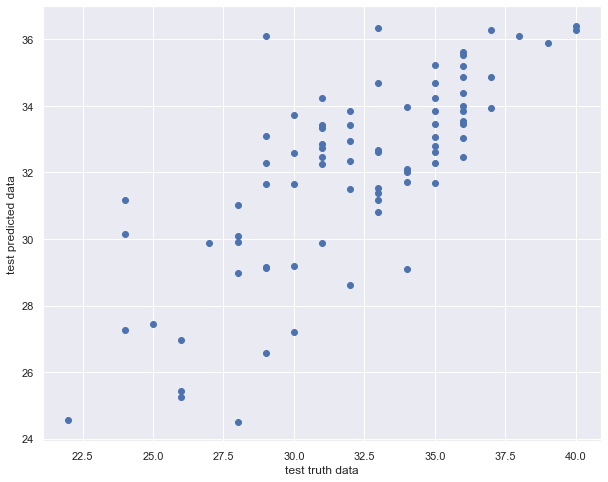

In [83]:
plt.scatter(y_test,rid_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

# residual or error

In [84]:
residuals = y_test-rid_pred

In [85]:
residuals

164    2.274455
60     1.530053
61     2.548683
63     3.306170
69     1.926891
         ...   
171    0.391049
234   -7.108117
146    1.468956
210   -3.357472
105   -2.554445
Name: Temperature, Length: 81, dtype: float64

# Performace Matrix

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

6.547457176540405
2.128538107623217
2.5587999485189155


# R squared and Adjusted R Square

In [87]:
from sklearn.metrics import r2_score
score = r2_score(y_test,rid_pred)
print(score)

0.567035552669056


In [88]:
adjusted_R_square = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

adjusted_R_square

0.4830275255749923

## 2. Lasso Algorithm

In [89]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train,y_train) 

Lasso()

## coefficient and intercept

In [90]:
print(lasso.coef_)
print(lasso.intercept_)

[ 0.         -0.          0.         -0.71955751 -0.         -0.
  0.89582004  0.          0.          0.          0.          0.
  0.        ]
32.17791411042945


## Prediction for Lasso 

In [91]:
las_pred = lasso.predict(x_test)
las_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

Text(0, 0.5, 'test predicted data')

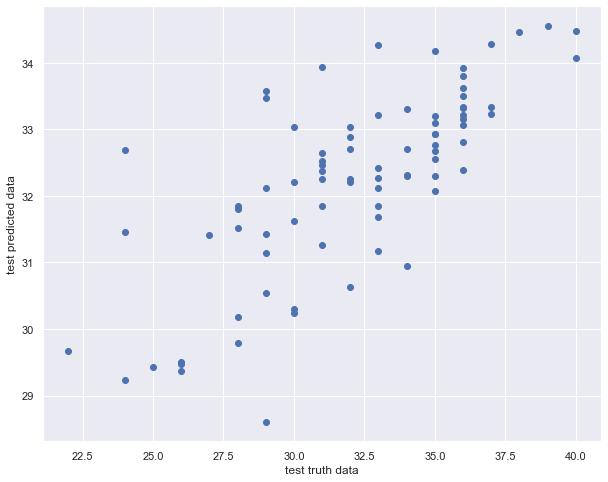

In [92]:
plt.scatter(y_test,las_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

## Residual or Error

In [93]:
residuals = y_test-las_pred
residuals

164    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
171    0.583574
234   -4.568827
146    0.882714
210   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

## Performance Matrix

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,las_pred))
print(mean_absolute_error(y_test,las_pred))
print(np.sqrt(mean_squared_error(y_test,las_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


##  R squared and Adjusted R Square

In [95]:
from sklearn.metrics import r2_score
score = r2_score(y_test,las_pred)
print(score)

0.39784019626969913


In [96]:
adjusted_R_square = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

adjusted_R_square

0.2810032194265064

## ElasticNet Algorithm

In [97]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(x_train,y_train)

ElasticNet()

## intercept and coeffinct

In [98]:
print(elastic.coef_)
print(elastic.intercept_)

[ 0.         -0.          0.         -0.68605172 -0.10752195 -0.01338467
  0.67086042  0.07615133  0.          0.2218267   0.04143585  0.11376013
  0.10954131]
32.17791411042945


## elastic predicition

In [99]:
ela_pred = elastic.predict(x_test)
ela_pred

array([31.8690815 , 32.98833851, 32.61957888, 31.68861761, 32.97100957,
       33.97367773, 33.52307284, 32.7018019 , 32.03633093, 32.7340146 ,
       33.4048647 , 29.86483898, 34.23784903, 30.6523006 , 32.76341665,
       32.29202402, 32.89706861, 29.42788094, 35.12423343, 33.9328964 ,
       32.44598476, 33.40684191, 33.53948479, 32.89730997, 35.136529  ,
       29.96060352, 32.18807673, 32.4724942 , 29.37826671, 32.08532921,
       29.16255676, 28.65749058, 33.27433372, 32.20950131, 32.70195301,
       31.25333733, 30.00400664, 32.37359311, 29.20081821, 34.01420084,
       32.84472027, 33.5729916 , 34.19772506, 31.64685556, 34.54837892,
       33.42534844, 29.3523535 , 33.97261365, 33.44367953, 30.28279181,
       31.51106009, 32.38126283, 34.65637218, 32.10790818, 31.43740706,
       30.85711351, 32.45308383, 34.84253461, 31.54991382, 33.48750784,
       32.17780297, 32.460305  , 31.19360541, 28.93515125, 31.80378734,
       34.8649855 , 30.74910002, 30.93640691, 33.87841899, 32.97

Text(0, 0.5, 'test predicted data')

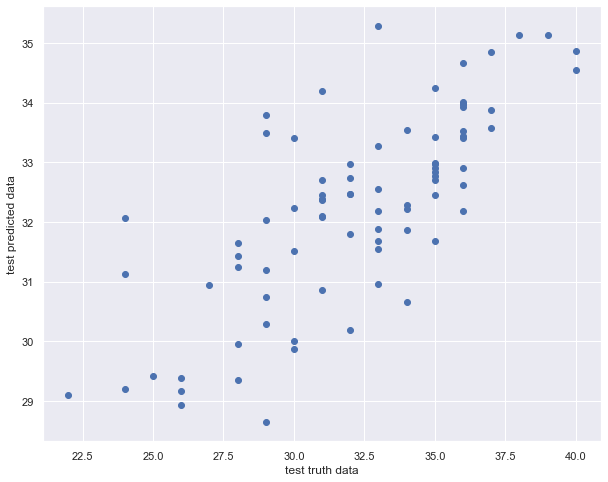

In [100]:
plt.scatter(y_test,ela_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

## residuals or error

In [101]:
residuals = y_test-ela_pred
residuals

164    2.130919
60     2.011661
61     3.380421
63     3.311382
69     2.028990
         ...   
171    0.447702
234   -4.788291
146    1.316062
210   -2.278562
105   -7.101439
Name: Temperature, Length: 81, dtype: float64

## Performance Matrix

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ela_pred))
print(mean_absolute_error(y_test,ela_pred))
print(np.sqrt(mean_squared_error(y_test,ela_pred)))

8.292727914292223
2.393453421352999
2.8797096927107466


## R squared and Adjusted R Square

In [103]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ela_pred)
print(score)

0.45162583557750313


In [104]:
adjusted_R_square = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

adjusted_R_square

0.3452248783014963

#  OR we can do like this with all the algorithm

In [105]:
from sklearn.linear_model import Lasso ,Ridge ,ElasticNet

lasso = Lasso()

ridge = Ridge()

elastic = ElasticNet()

models = [ lasso, ridge, elastic ]

models

def linear(i, x_train, x_test, y_train, y_test):
    i.fit(x_train, y_train)
    
    print(f"\ncoefficent : \n {i.coef_}")
    print(f'\nintercept : \n {i.intercept_}')
    
    pred = i.predict(x_test)
    
    print(f'\n{"-"*30} Results for {i} Algorithm {"-"*30}\n')
    
    print(f'MSE:{mean_squared_error(y_test,reg_pred)}')
    print(f'MAE:{mean_absolute_error(y_test,reg_pred)}')
    print(f'RMSE:{np.sqrt(mean_squared_error(y_test,reg_pred))}')
    
    score = r2_score(y_test,reg_pred)
    print(f'R Square :{score}')
    
    adjusted_R_square = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    print(f'Adjusted R Square : {adjusted_R_square}')
          
          
for i in models:
    linear(i, x_train, x_test, y_train, y_test)          


coefficent : 
 [ 0.         -0.          0.         -0.71955751 -0.         -0.
  0.89582004  0.          0.          0.          0.          0.
  0.        ]

intercept : 
 32.17791411042945

------------------------------ Results for Lasso() Algorithm ------------------------------

MSE:6.535206240373402
MAE:2.1275974128550454
RMSE:2.5564049445213883
R Square :0.5678456717219669
Adjusted R Square : 0.48399483190682613

coefficent : 
 [-0.14245842 -0.29561552  0.         -1.27493742 -0.59461555 -0.19509065
  0.91872372  0.235304    0.7697288   0.36556273 -0.33071133 -0.34180818
  0.1975108 ]

intercept : 
 32.17791411042945

------------------------------ Results for Ridge() Algorithm ------------------------------

MSE:6.535206240373402
MAE:2.1275974128550454
RMSE:2.5564049445213883
R Square :0.5678456717219669
Adjusted R Square : 0.48399483190682613

coefficent : 
 [ 0.         -0.          0.         -0.68605172 -0.10752195 -0.01338467
  0.67086042  0.07615133  0.          0.22182